In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image, ImageFilter

import torch

from skimage.metrics import mean_squared_error as mse
from skimage import io

import cv2 as cv

import time

import random
random.seed(999)

from codes import my_loader
from  codes import my_utils 

from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm

from codes.GAN_class import DownsampleGAN


print(torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


True


In [2]:
train_loader, validation_loader = my_loader.my_load_creator()

22-05-10 17:43:55.009 - INFO:   name: 001_TOF_scratch_lr1e-4_150k_RealVSR_3frame_WiCutBlur_YCbCr_CB
  use_tb_logger: True
  model: VideoSR_AllPair_YCbCr_Combine
  distortion: sr
  scale: 1
  gpu_ids: [0, 1, 2, 3]
  datasets:[
    train:[
      name: RealVSR_Train
      mode: RealVSR_AllPair
      interval_list: [1]
      random_reverse: False
      border_mode: False
      dataroot_GT: /home/ezgor/datasets/RealVSR/GT
      dataroot_LQ: /home/ezgor/datasets/RealVSR/LQ
      cache_keys: ./keys/realvsr_keys.pkl
      remove_list: ./keys/remove_seqs.pkl
      N_frames: 1
      use_shuffle: True
      n_workers: 3
      batch_size: 32
      GT_size: 192
      LQ_size: 192
      use_flip: True
      use_rot: True
      color: ycbcr
      phase: train
      scale: 1
      data_type: img
    ]
    val:[
      name: RealVSR_Test
      mode: VideoTest
      dataroot_GT: /home/ezgor/datasets/RealVSR/GT_test
      dataroot_LQ: /home/ezgor/datasets/RealVSR/LQ_test
      cache_data: False
      GT_s

export CUDA_VISIBLE_DEVICES=0,1,2,3
Disabled distributed training.
Path already exists. Rename it to [/home/ezgor/IIT/experiments/001_TOF_scratch_lr1e-4_150k_RealVSR_3frame_WiCutBlur_YCbCr_CB_archived_220510-174354]


22-05-10 17:43:55.392 - INFO: Random seed: 0
22-05-10 17:43:55.445 - INFO: Temporal augmentation interval list: [1], with random reverse is False.
22-05-10 17:43:55.446 - INFO: Using cache keys: ./keys/realvsr_keys.pkl
22-05-10 17:43:55.477 - INFO: Remove sequences: ['016', '018', '028', '029', '039', '044', '049', '088', '090', '108', '135', '157', '159', '169', '170', '211', '212', '223', '245', '246', '247', '250', '266', '276', '279', '289', '293', '295', '303', '317', '323', '344', '346', '360', '362', '364', '374', '407', '429', '431', '433', '449', '451', '458', '461', '471', '472', '484', '488', '492']
22-05-10 17:43:55.478 - INFO: Dataset [RealVSRAllPairDataset - RealVSR_Train] is created.
22-05-10 17:43:55.478 - INFO: Number of train images: 22,500, iters: 704
22-05-10 17:43:55.479 - INFO: Total epochs needed: 214 for iters 150,000
22-05-10 17:43:55.685 - INFO: Dataset [VideoTestDataset - RealVSR_Test] is created.
22-05-10 17:43:55.686 - INFO: Number of val images in [RealVSR

In [3]:
gan = my_utils.load_model('./saved_weights/models/mod_19')

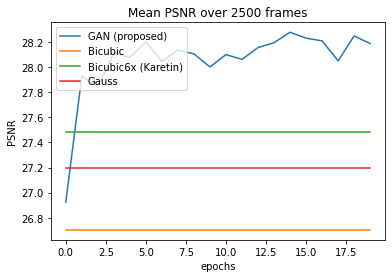

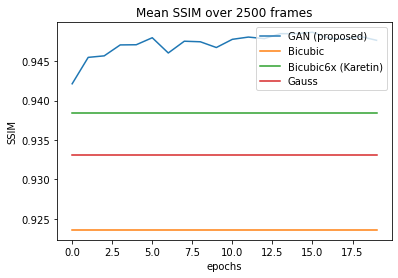

/home/ezgor/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/ezgor/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


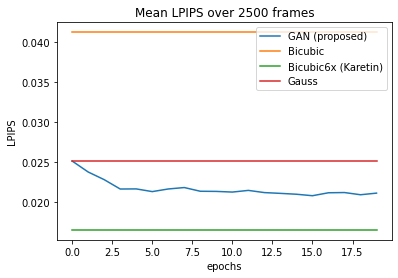

In [4]:
ep = len(gan.validation_losses['G']['PSNR'])
for x in gan.validation_losses['BC']:
    plt.plot(range(ep), gan.validation_losses['G'][x], label = 'GAN (proposed)')
    plt.plot(range(ep), [gan.validation_losses['BC'][x] for i in range(ep)], label = "Bicubic")
    plt.plot(range(ep), [gan.validation_losses['BC6'][x] for i in range(ep)], label = "Bicubic6x (Karetin)")
    plt.plot(range(ep), [gan.validation_losses['GS'][x] for i in range(ep)], label = "Gauss")
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel(x)
    plt.title(f'Mean {x} over {len(validation_loader)} frames')
    plt.show()


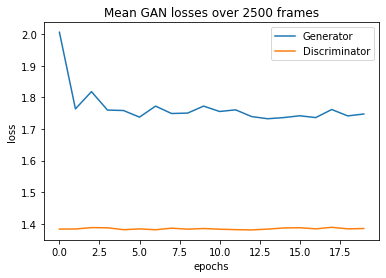

In [5]:
plt.plot(range(ep), gan.validation_losses['G']['GAN'], label = 'Generator')
plt.plot(range(ep), gan.validation_losses['D'], label = 'Discriminator')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title(f'Mean GAN losses over {len(validation_loader)} frames')
plt.show()